In [1]:
import numpy as np
import nnhealpix
import nnhealpix.map_ordering
import nnhealpix.layers.blocks
import healpy as hp
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
Nside=32

In [3]:
m = np.arange(hp.nside2npix(Nside))

In [4]:
mtensor = m.reshape(1, len(m), 1)
shape = (len(m), 1)
inputs = keras.layers.Input(shape)
x = nnhealpix.layers.blocks.Dgrade(Nside, 8)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12288, 1)          0         
_________________________________________________________________
order_map_1 (OrderMap)       (None, 12288, 1)          0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 768, 1)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


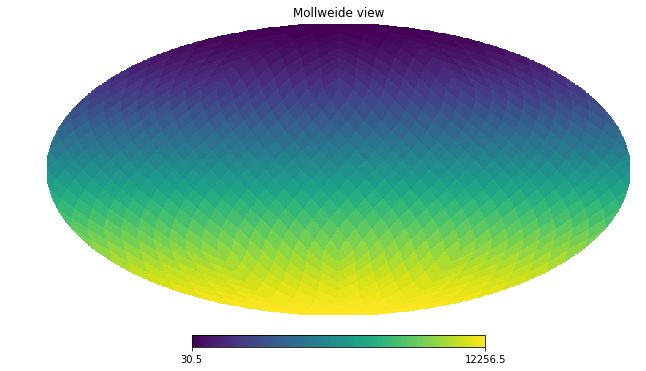

In [6]:
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(8))
hp.mollview(out)